In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [12]:
def find_threshold(src_img):
    # Set total number of bins in the histogram
    bins_num = 256

    # Get the image histogram
    flat_im = src_img.flatten()
    hist, bin_edges = np.histogram(flat_im, bins=bins_num)

    # Calculate centers of bins
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    # Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]

    # Get the class means mu0(t)
    mean1 = np.cumsum(hist * bin_mids) / weight1
    # Get the class means mu1(t)
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

    # Maximize the inter_class_variance function val
    index_of_max_val = np.argmax(inter_class_variance)

    threshold = bin_mids[:-1][index_of_max_val]

    return threshold

In [15]:
def otsu_threshold(src_im):
    threshold = find_threshold(im)
    return np.array([(lambda x: [(lambda y: 1 if y >= threshold else 0)(y) for y in x] )(x) for x in src_im])

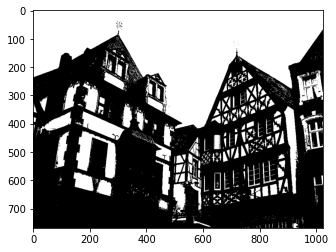

In [18]:
im = cv2.imread('otsu_1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(otsu_threshold(im), cmap='gray')

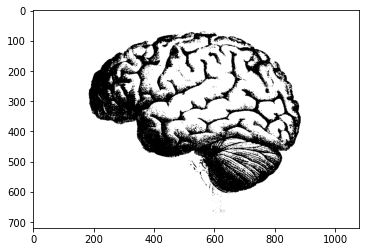

In [19]:
im = cv2.imread('otsu_2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(otsu_threshold(im), cmap='gray')